In [1]:
%matplotlib inline

In [3]:
import pandas as pd 
import numpy as np 
import os

In [11]:
# cwd = os.getcwd()
# input_file = os.path.normpath(cwd + '/ideal_weight.csv')
df = pd.DataFrame.from_csv('ideal_weight.csv')

In [22]:
#remove ' from column names
cols = []
for name in df.columns.values:
    tcol = name.replace("'","")
    cols.append(tcol)
df.columns = cols

In [23]:
df.head()

,sex,actual,ideal,diff
'id',,,,
0,'Male',215,190,25
1,'Female',155,135,20
2,'Male',195,155,40
3,'Female',145,130,15
4,'Female',110,100,10


In [28]:
# remove ' from sex
df['sex'] = [gender.replace("'","") for gender in df['sex']]

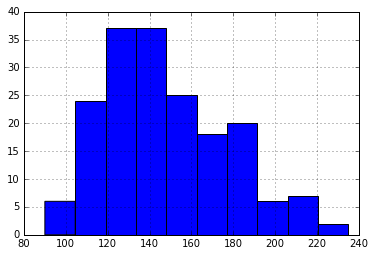

In [31]:
# plot the distributions
df['actual'].hist()

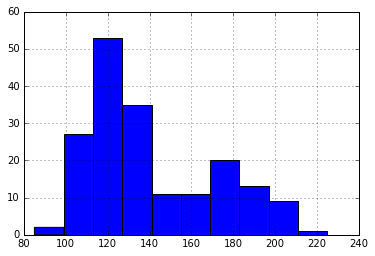

In [32]:
df['ideal'].hist()

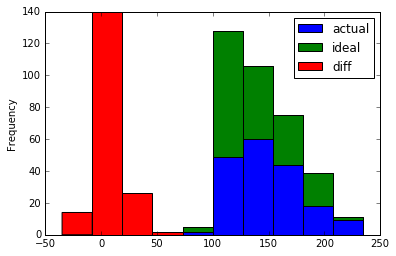

In [40]:
# from matplotlib import pyplot as plt
df.plot.hist(stacked=True)


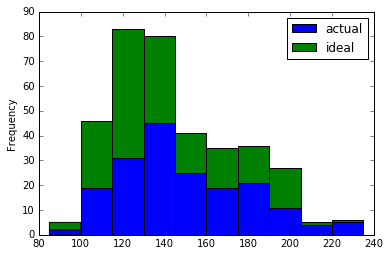

In [44]:
# myhist = df.iloc('actual','ideal')

# myhist.hist(stacked=True)

df[['actual','ideal']].plot.hist(stacked = True)

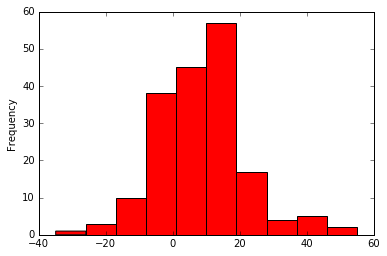

In [50]:
df['diff'].plot.hist(color='red')

In [51]:
test1 = pd.get_dummies(df)

In [52]:
test1.head()

,actual,ideal,diff,sex_Female,sex_Male
'id',,,,,
0,215,190,25,0,1
1,155,135,20,1,0
2,195,155,40,0,1
3,145,130,15,1,0
4,110,100,10,1,0


In [53]:
test1.describe()

,actual,ideal,diff,sex_Female,sex_Male
count,182.000000,182.000000,182.000000,182.000000,182.000000
mean,147.774725,139.950549,7.824176,0.653846,0.346154
std,30.317269,29.750580,12.759651,0.477055,0.477055
min,90.000000,85.000000,-35.000000,0.000000,0.000000
25%,125.000000,120.000000,0.000000,0.000000,0.000000
50%,140.000000,130.000000,7.000000,1.000000,0.000000
75%,170.000000,164.500000,11.000000,1.000000,1.000000
max,235.000000,225.000000,55.000000,1.000000,1.000000


In [54]:
#more females in the file - implied by higher mean in describe - actually since the values are 1 and zero - that's a percentage
# 65% female.

In [58]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"
% (iris.data.shape[0],(iris.target != y_pred).sum()))
# Number of mislabeled points out of a total 150 points : 6

# Fit a Naive Bayes classifier of sex to actual weight, ideal weight, and diff.




Number of mislabeled points out of a total 150 points : 6


In [60]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
clf = gnb.fit(df[['actual','ideal','diff']], df['sex'])

In [62]:
y_pred = clf.predict(df[['actual','ideal','diff']])


In [64]:
print("Number of mislabeled points out of a total %d points : %d"
% (df.shape[0],(df['sex'] != y_pred).sum()))

Number of mislabeled points out of a total 182 points : 14


In [66]:
# Predict the sex for an actual weight of 145, an ideal weight of 160, and a diff of -15.
# Predict the sex for an actual weight of 160, an ideal weight of 145, and a diff of 15.

clf.predict([145,160,-15])

C:\Users\bob071988\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array(['Male'], 
      dtype='|S6')

In [67]:
clf.predict([160,145,15])

C:\Users\bob071988\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array(['Female'], 
      dtype='|S6')

In [68]:
clf

GaussianNB(priors=None)

In [71]:
clf.predict_proba.im_self

GaussianNB(priors=None)

In [72]:
clf.get_params

<bound method GaussianNB.get_params of GaussianNB(priors=None)>

In [73]:
clf.get_params()

{'priors': None}

In [81]:
clf.score(test1[['actual','ideal','diff']], test1['sex_Female'])

C:\Users\bob071988\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:177: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


0.0